In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import rfpimp
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score



In [2]:
data = pd.read_csv('music_genre.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50005 entries, 0 to 50004
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       50000 non-null  float64
 1   artist_name       50000 non-null  object 
 2   track_name        50000 non-null  object 
 3   popularity        50000 non-null  float64
 4   acousticness      50000 non-null  float64
 5   danceability      50000 non-null  float64
 6   duration_ms       50000 non-null  float64
 7   energy            50000 non-null  float64
 8   instrumentalness  50000 non-null  float64
 9   key               50000 non-null  object 
 10  liveness          50000 non-null  float64
 11  loudness          50000 non-null  float64
 12  mode              50000 non-null  object 
 13  speechiness       50000 non-null  float64
 14  tempo             50000 non-null  object 
 15  obtained_date     50000 non-null  object 
 16  valence           50000 non-null  float6

In [3]:
hist_columns = ['popularity', 'acousticness', 'danceability', 
                'energy', 'instrumentalness', 'liveness', 'loudness', 
                'speechiness', 'valence']

In [4]:
data=data[hist_columns]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50005 entries, 0 to 50004
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        50000 non-null  float64
 1   acousticness      50000 non-null  float64
 2   danceability      50000 non-null  float64
 3   energy            50000 non-null  float64
 4   instrumentalness  50000 non-null  float64
 5   liveness          50000 non-null  float64
 6   loudness          50000 non-null  float64
 7   speechiness       50000 non-null  float64
 8   valence           50000 non-null  float64
dtypes: float64(9)
memory usage: 3.4 MB


In [5]:
columns_without_pop = hist_columns[:]
columns_without_pop.remove('popularity')


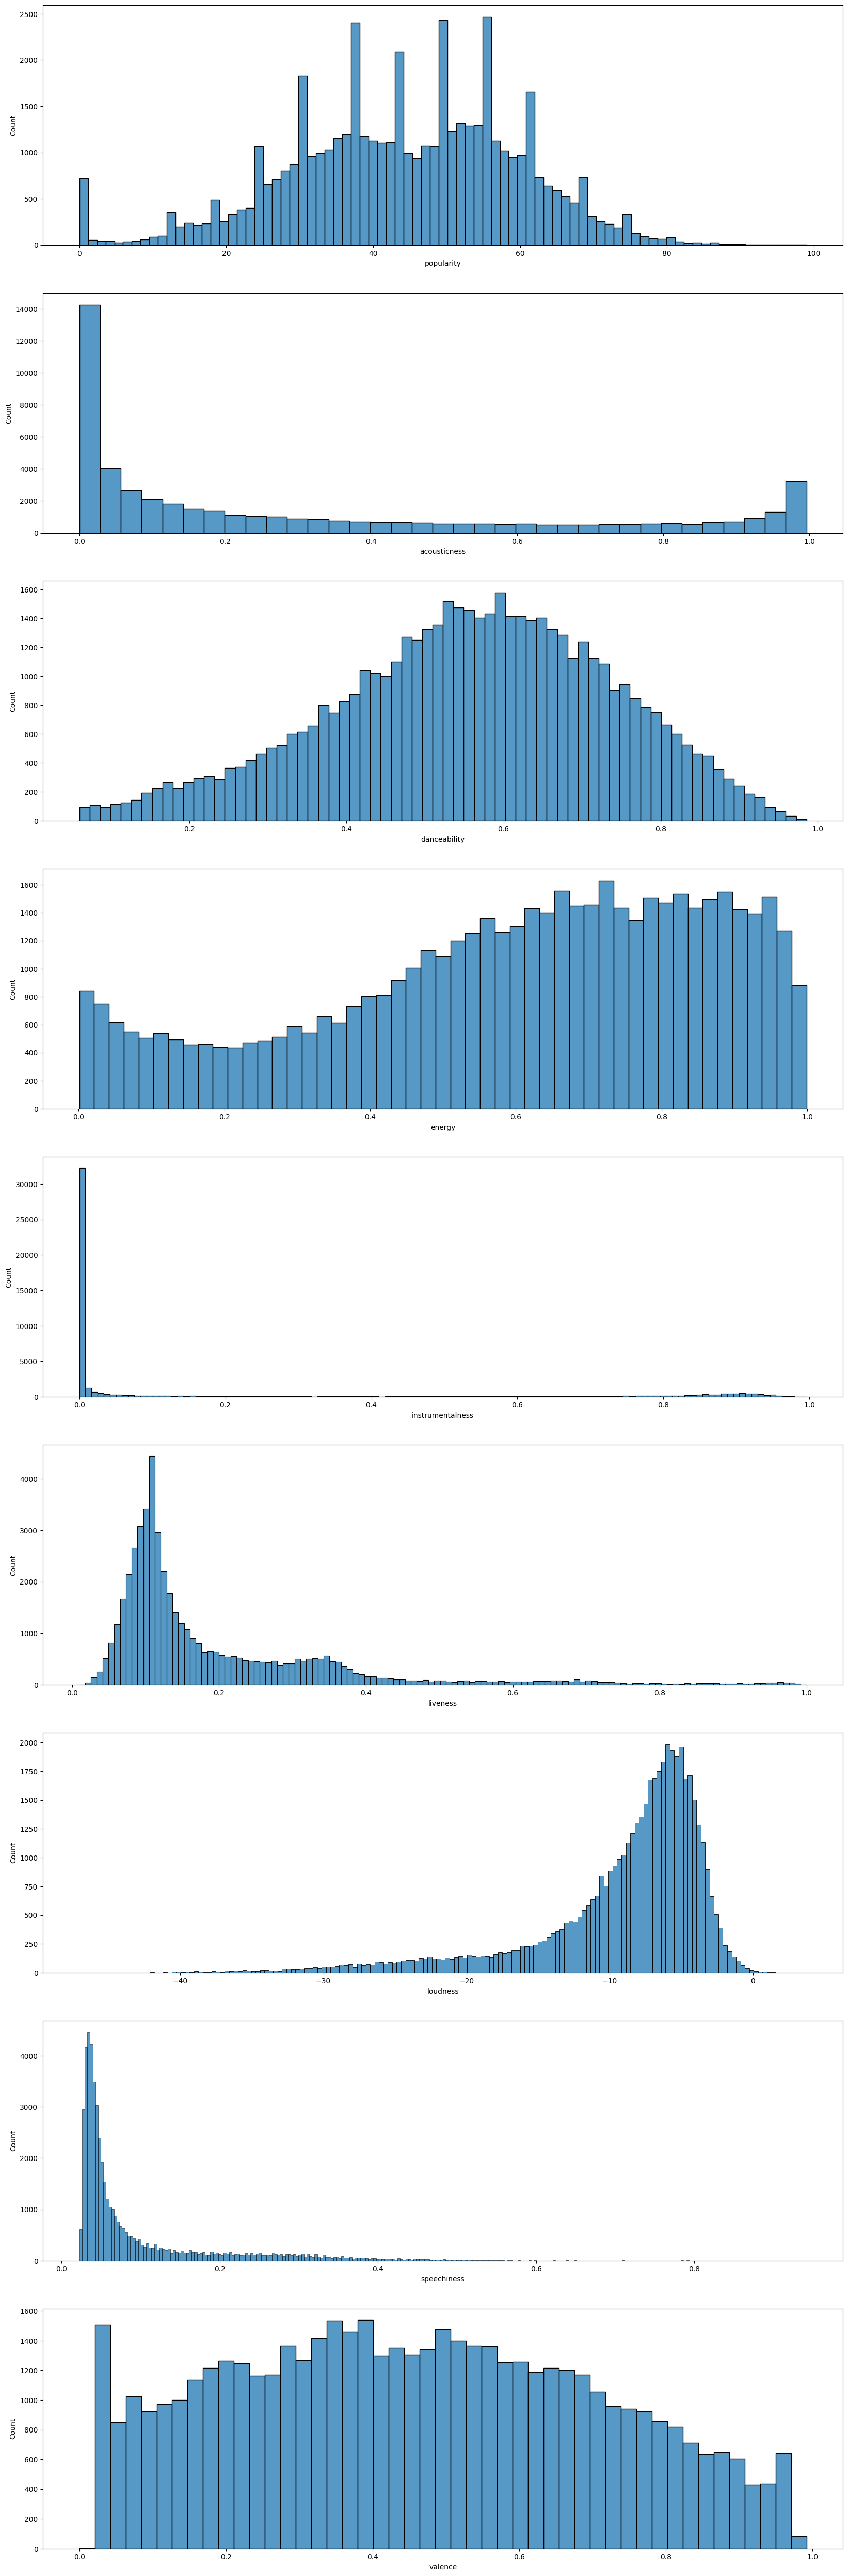

In [6]:
fig, axs = plt.subplots(len(hist_columns), 1, figsize=(20, 64))
for i, ax in enumerate(axs.flatten()):
    sns.histplot(data, x=hist_columns[i], ax=ax)


IndexError: list index out of range

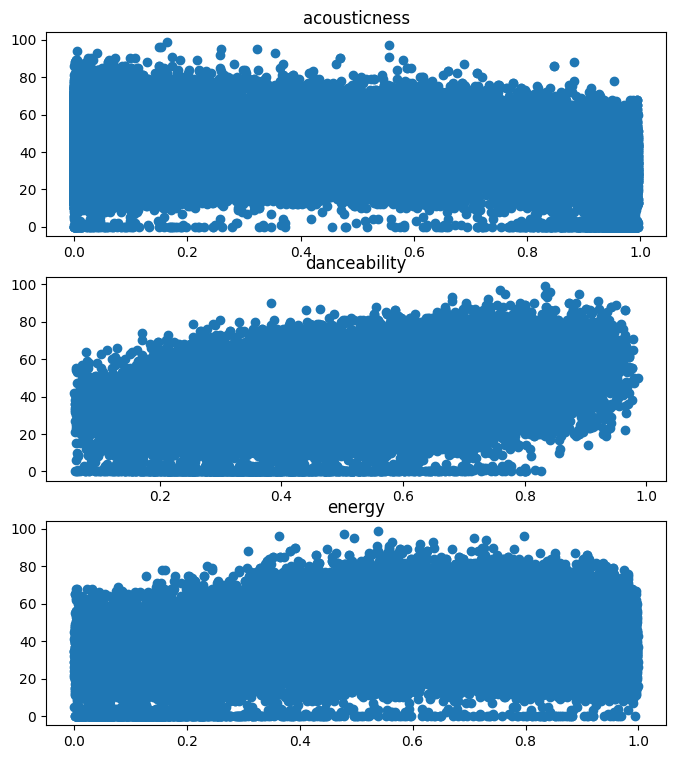

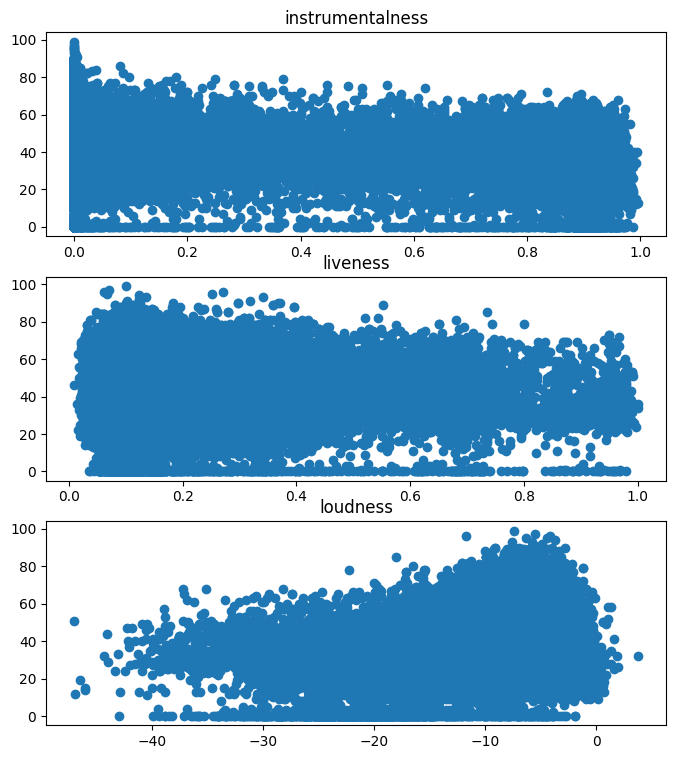

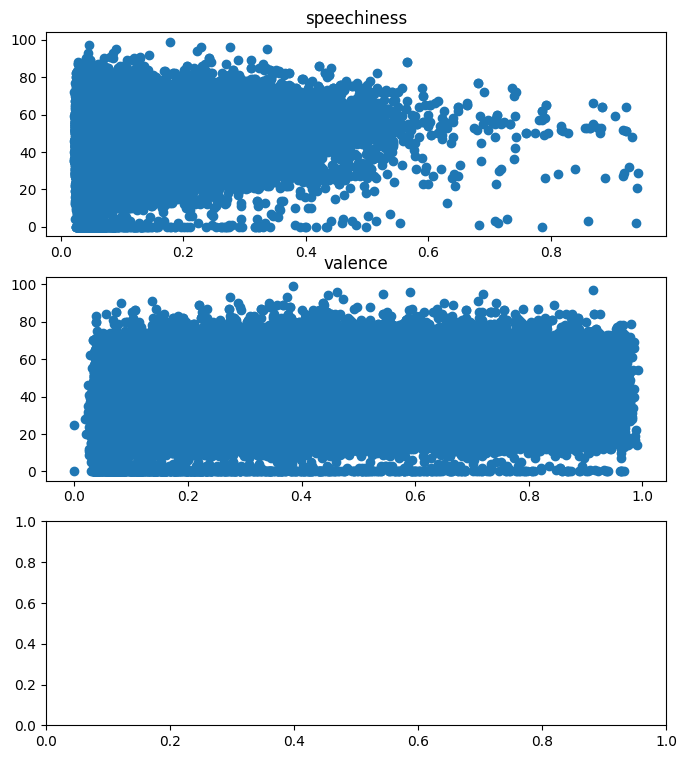

In [7]:
y_column = 'popularity'
for i in range(3):
    fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(8, 9))
    
    for j in range(3):
        x_column = hist_columns[1:][i*3 + j]
        axs[j].scatter(data[x_column], data[y_column])
        axs[j].set_title(x_column)
    
    fig.savefig(f'sc_{i}_row.png')

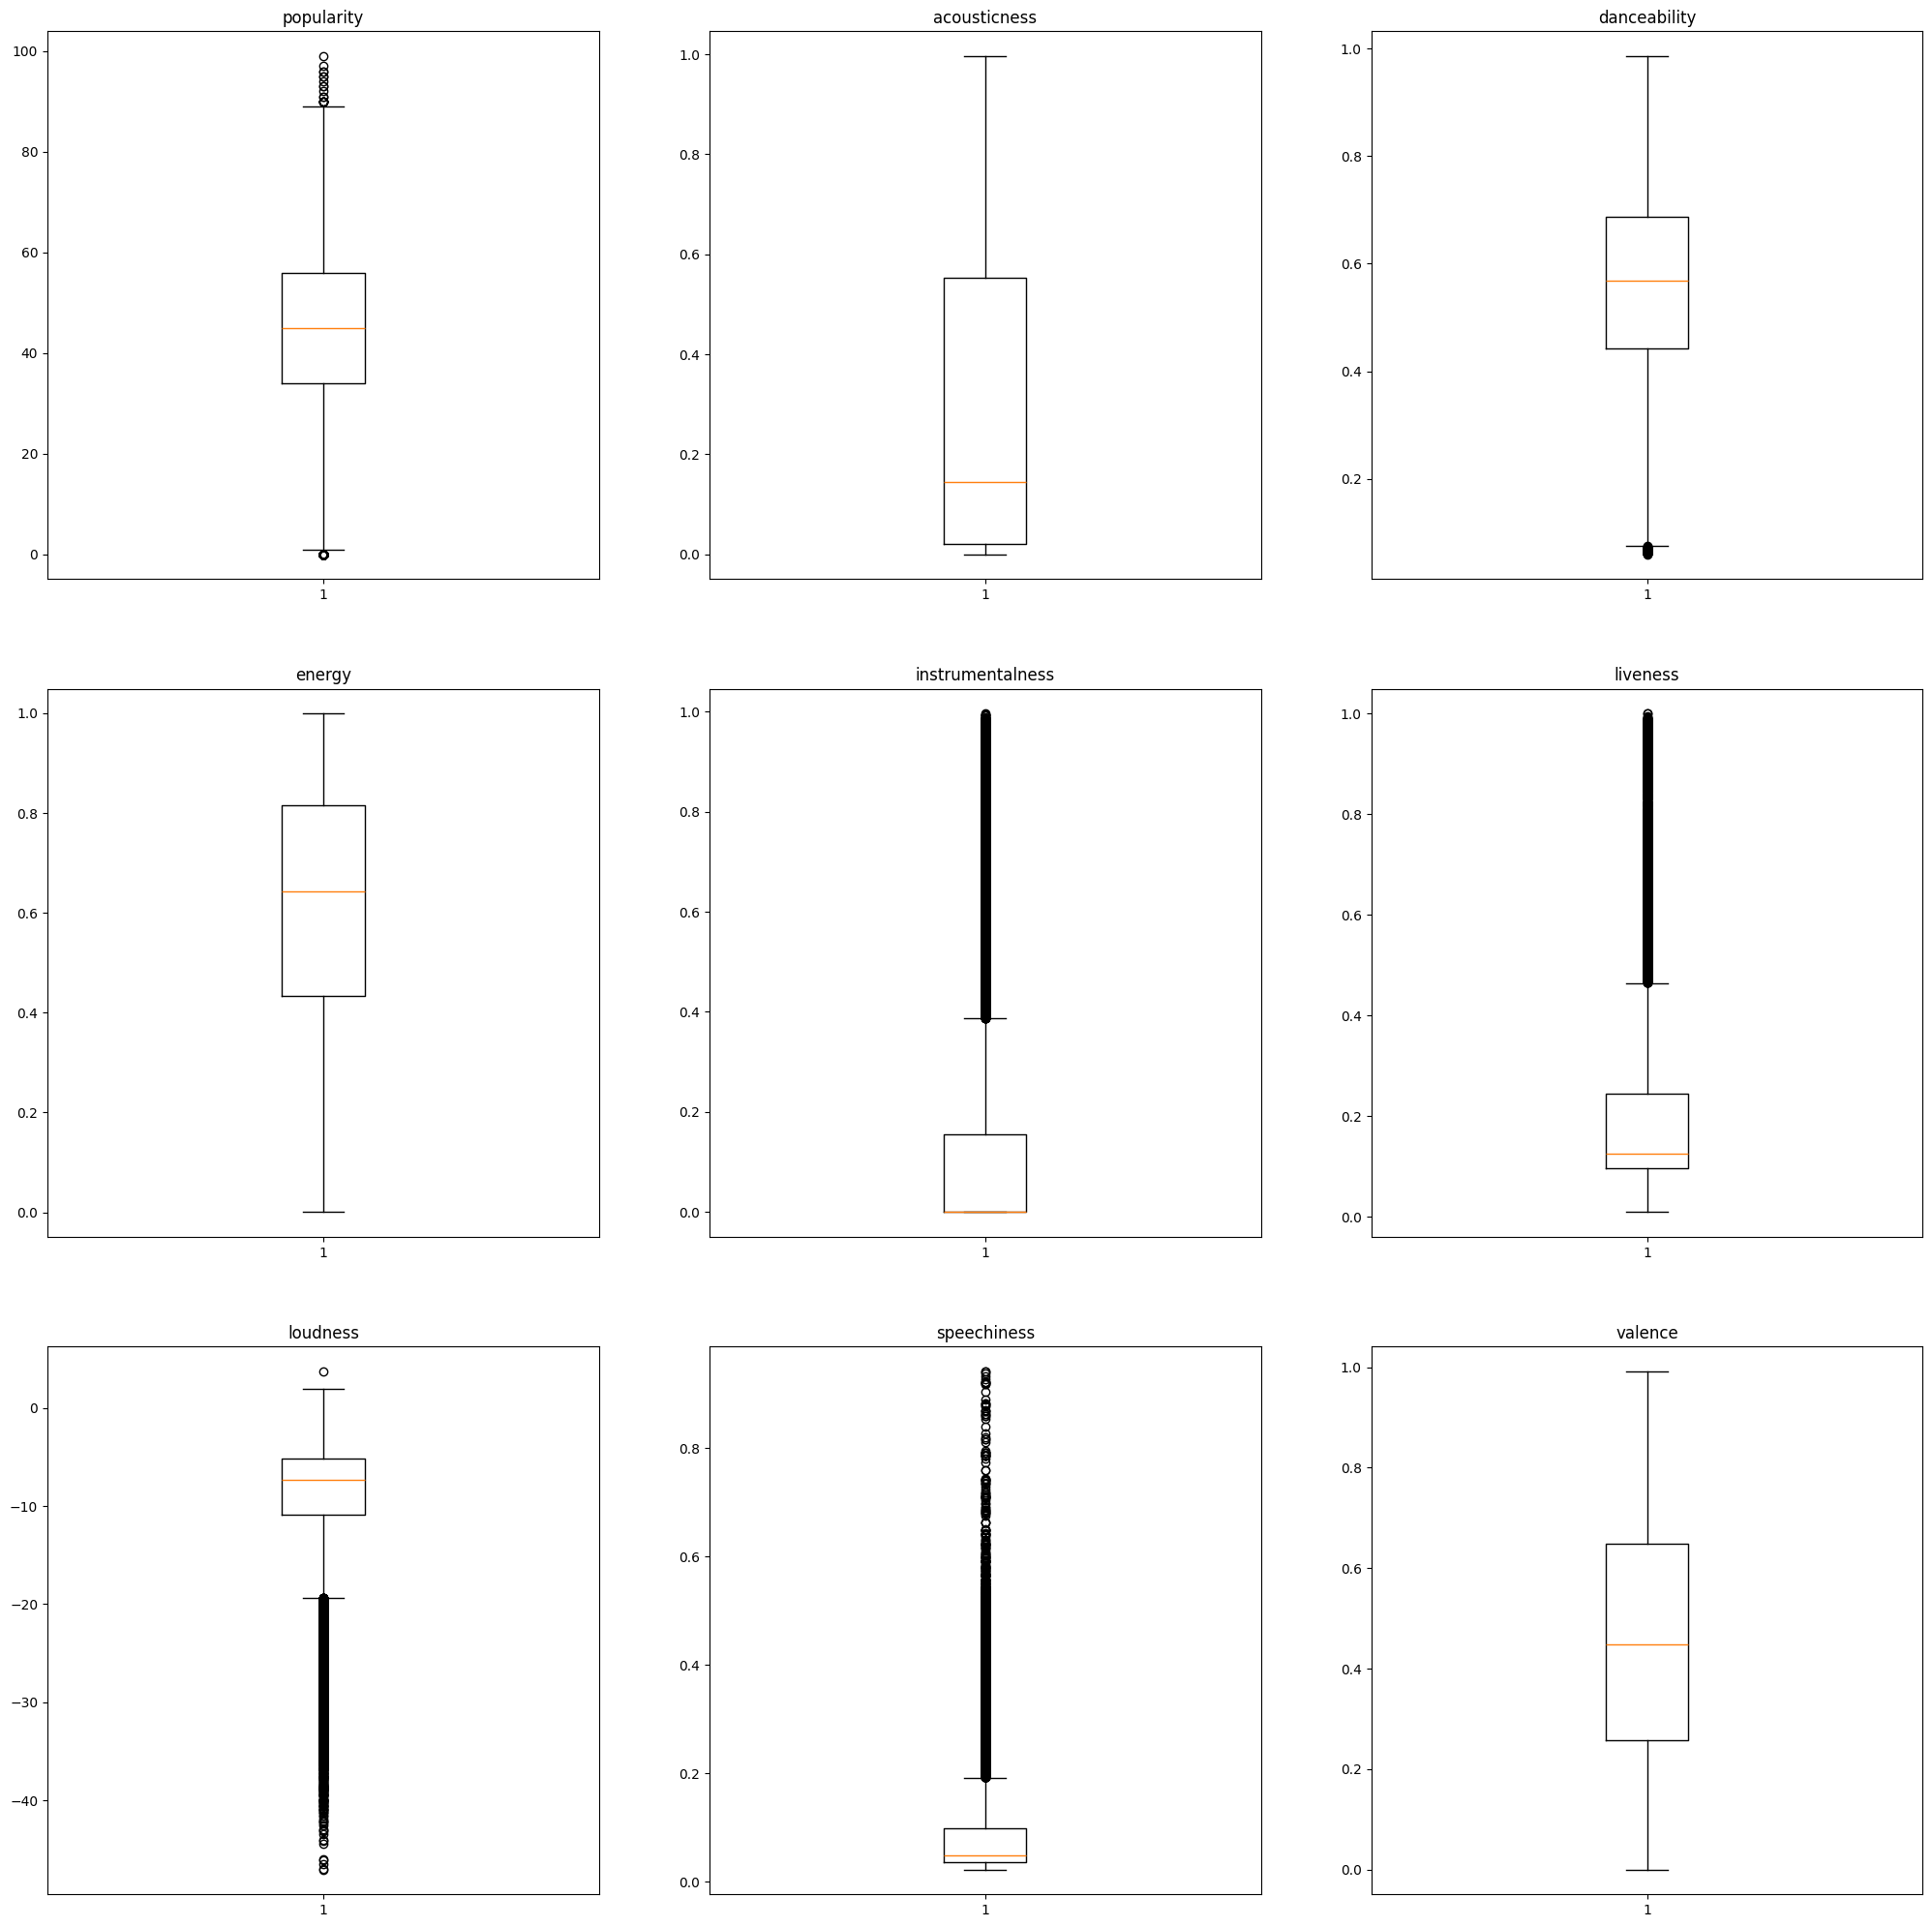

In [8]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(25, 25), dpi=100)

for i, column in enumerate(hist_columns[:9]):
    ax = axs[i//3, i%3]
    ax.boxplot(data[column][~np.isnan(data[column])])
    ax.set_title(column)

fig.savefig('boxplots.png')

In [9]:

data = data.dropna()
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 0 to 50004
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        50000 non-null  float64
 1   acousticness      50000 non-null  float64
 2   danceability      50000 non-null  float64
 3   energy            50000 non-null  float64
 4   instrumentalness  50000 non-null  float64
 5   liveness          50000 non-null  float64
 6   loudness          50000 non-null  float64
 7   speechiness       50000 non-null  float64
 8   valence           50000 non-null  float64
dtypes: float64(9)
memory usage: 3.8 MB


In [10]:
data.corr().round(3)

,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence
popularity,1.000,-0.290,0.356,0.216,-0.365,-0.039,0.318,0.224,0.125
acousticness,-0.290,1.000,-0.348,-0.791,0.388,-0.109,-0.730,-0.163,-0.270
danceability,0.356,-0.348,1.000,0.264,-0.301,-0.051,0.391,0.280,0.435
energy,0.216,-0.791,0.264,1.000,-0.390,0.187,0.838,0.158,0.396
instrumentalness,-0.365,0.388,-0.301,-0.390,1.000,-0.094,-0.529,-0.199,-0.273
liveness,-0.039,-0.109,-0.051,0.187,-0.094,1.000,0.127,0.114,0.052
loudness,0.318,-0.730,0.391,0.838,-0.529,0.127,1.000,0.166,0.341
speechiness,0.224,-0.163,0.280,0.158,-0.199,0.114,0.166,1.000,0.060
valence,0.125,-0.270,0.435,0.396,-0.273,0.052,0.341,0.060,1.000


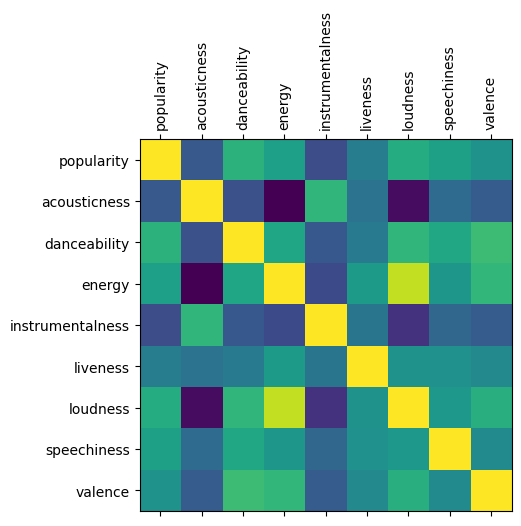

In [11]:
plt.matshow(data.corr())
plt.xticks(range(0, len(hist_columns)), data.columns, rotation=90)
plt.yticks(range(0, len(hist_columns)), data.columns)
plt.show()


In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(['popularity'], axis=1),
    data['popularity'],
    test_size=0.333
)
print(X_train.shape, X_test.shape, sep=' ')

(33350, 8) (16650, 8)


In [13]:
import random


def print_results(regression, X, y):
    predicted = regression.predict(X)
    free_coeff = regression.intercept_
    columns_coeffs = regression.coef_.ravel()

    sko = mean_squared_error(y, predicted.ravel())
    r2 = r2_score(y, predicted.ravel())

    print('Свободный коэффициент регрессии: ', free_coeff)
    print()
    print('Коэффициенты регрессии для столбцов: ')
    for i in range(0, len(columns_without_pop)):
        print('\t', columns_without_pop[i], ':\t', columns_coeffs[i], sep='')
    print()
    print('СКО = ', sko)
    print()
    print('Коэффициент детерминации R2 = ', r2)
    print()
    actual_and_predicted_comparison(regression, X, y, fig)
    return sko, r2


def actual_and_predicted_comparison(regression, X, y, fig):
    fig.add_subplot()
    plt.title('Comparison of actual and predicted values')
    plt.ylabel('popularity')
    plt.xlabel('song')
    plt.scatter([i for i in range(len(y))], y, s=1, c='b')
    plt.scatter([i for i in range(len(y))], linear_regression.predict(X), s=1, c='y')
    plt.show()


In [14]:
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)


LinearRegression()

Свободный коэффициент регрессии:  47.49442221906273

Коэффициенты регрессии для столбцов: 
	acousticness:	-6.673504316254121
	danceability:	18.703467342747192
	energy:	-8.395439729280252
	instrumentalness:	-10.906028603299692
	liveness:	-5.959365431798156
	loudness:	0.3522192942470568
	speechiness:	17.02134010099974
	valence:	-4.091887616803269

СКО =  185.74679526029996

Коэффициент детерминации R2 =  0.22521158531622232



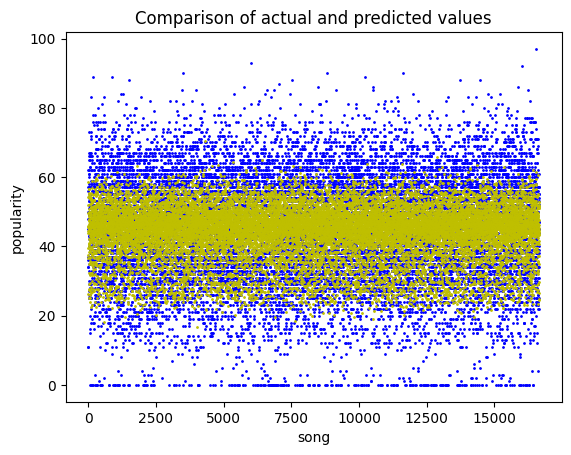

In [15]:
linear_sko, linear_r2 = print_results(linear_regression, X_test, y_test)

In [16]:
lasso_regression = Lasso()
lasso_param_grid = {"alpha":[0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 20, 50, 100, 300, 500]}
lasso_grid_searched = GridSearchCV(lasso_regression, lasso_param_grid, cv=5)

lasso_grid_searched.fit(X_train, y_train)
lasso_best_params = lasso_grid_searched.best_estimator_

print('Best params for LASSO-regression: ', lasso_best_params, sep='')


Best params for LASSO-regression: Lasso(alpha=1e-05)


Свободный коэффициент регрессии:  47.49387927293167

Коэффициенты регрессии для столбцов: 
	acousticness:	-6.673164263544024
	danceability:	18.70333621766211
	energy:	-8.394796470968481
	instrumentalness:	-10.9059782988453
	liveness:	-5.959005618287059
	loudness:	0.35221191217409653
	speechiness:	17.020383749826138
	valence:	-4.091735197689617

СКО =  185.74672200886005

Коэффициент детерминации R2 =  0.22521189086317372



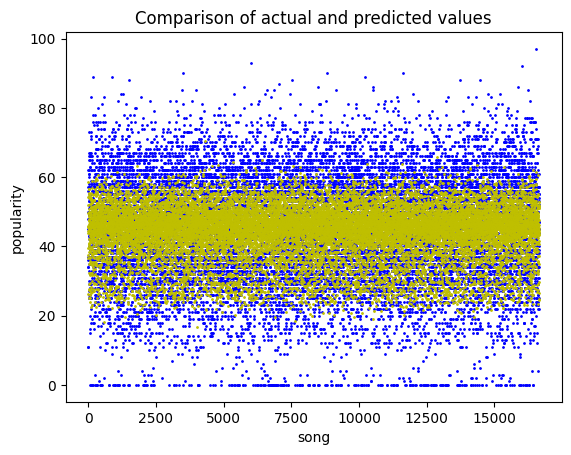

In [17]:
lasso_sko, lasso_r2 = print_results(lasso_best_params, X_test, y_test)

In [18]:
ridge_regression = Ridge()
ridge_param_grid = {"alpha":[0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 20, 50, 100, 300, 500]}
ridge_grid_searched = GridSearchCV(ridge_regression, ridge_param_grid, cv=5)

ridge_grid_searched.fit(X_train, y_train)
ridge_best_params = ridge_grid_searched.best_estimator_

print('Best params for ridge-regression: ', ridge_best_params, sep='')


Best params for ridge-regression: Ridge(alpha=1)


Свободный коэффициент регрессии:  47.49298506727838

Коэффициенты регрессии для столбцов: 
	acousticness:	-6.6679509435007605
	danceability:	18.6905580643257
	energy:	-8.382484022120734
	instrumentalness:	-10.905277687870655
	liveness:	-5.952735249107639
	loudness:	0.3521946574400446
	speechiness:	16.975218812052518
	valence:	-4.087824396921592

СКО =  185.74389721837923

Коэффициент детерминации R2 =  0.22522367365024876



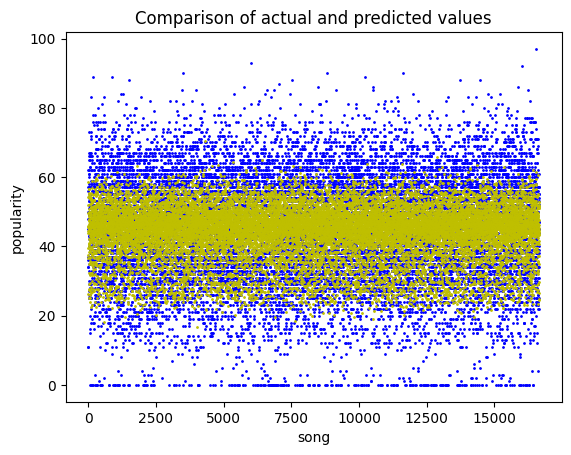

In [19]:
ridge_sko, ridge_r2 = print_results(ridge_best_params, X_test, y_test)



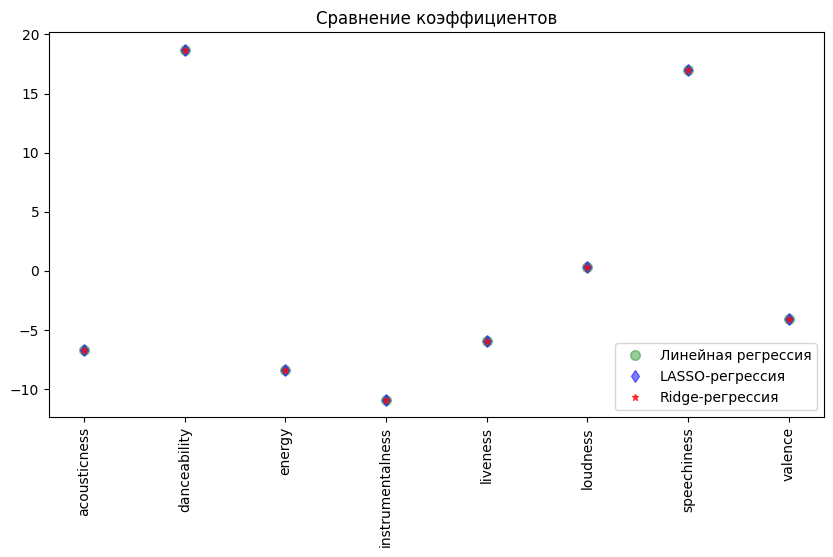

In [20]:
plt.figure(figsize = (10, 5))
plt.plot(X_test.columns,linear_regression.coef_.ravel(),alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Линейная регрессия')
plt.plot(X_test.columns, lasso_best_params.coef_.ravel(),alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'LASSO-регрессия')
plt.plot(X_test.columns,ridge_best_params.coef_.ravel(),alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge-регрессия',zorder=7)

plt.xticks(rotation = 90)
plt.legend()
plt.title("Сравнение коэффициентов")
plt.show()



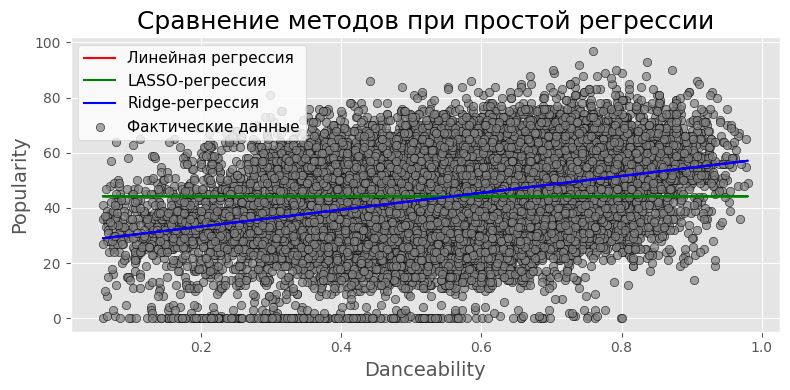

In [21]:
x = X_test['danceability'].values.reshape(-1, 1)
y = y_test

lin = LinearRegression()
lin.fit(x, y)
lin_pred = lin.predict(x)

las = Lasso()
las.fit(x, y)
las_pred = las.predict(x)

rid = Ridge()
rid.fit(x, y)
rid_pred = rid.predict(x)

plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(x, lin_pred, color='r', label='Линейная регрессия')
ax.plot(x, las_pred, color='g', label='LASSO-регрессия')
ax.plot(x, rid_pred, color='b', label='Ridge-регрессия')
ax.scatter(x, y, edgecolor='k', facecolor='grey', alpha=0.7, label='Фактические данные')
ax.set_ylabel('Popularity', fontsize=14)
ax.set_xlabel('Danceability', fontsize=14)
ax.text(0.8, 0.1, '', fontsize=13, ha='center', va='center', transform=ax.transAxes, color='grey', alpha=0.5)
ax.legend(facecolor='white', fontsize=11)
ax.set_title('Сравнение методов при простой регрессии', fontsize=18)

fig.tight_layout()

